In [67]:
#Description: The purpose of this report is to build a sentiment anlaysis for three specific stocks, SPY, JNJ & TSLA

In [68]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import numpy as np
import re
from textblob import TextBlob
import textblob
import tweepy
import sys
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt4
from alpaca_trade_api.rest import REST
%matplotlib inline

In [69]:
load_dotenv()

True

In [70]:
consumer_key = os.getenv("consumer_key")
consumer_secret = os.getenv("consumer_secret")
Access_Token = os.getenv("Access_Token")
Access_Token_Secret = os.getenv("Access_Token_Secret")

In [71]:
auth_handler = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth_handler.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(auth_handler, wait_on_rate_limit=True)


In [72]:
tsla_serch_term = '#TSLA -filter:retweets'

In [73]:
tweet_amount = 1000


In [74]:
tsla_tweets = tweepy.Cursor(api.search, q=tsla_serch_term, lang='en', since= '2018-01-01', tweet_mode= 'extended').items(tweet_amount)


In [75]:
tsla_all_tweets = [tweet.full_text for tweet in tsla_tweets]


In [76]:
#this Data Frame is used to create the set needed to
tsla_tweets_df = pd.DataFrame(tsla_all_tweets, columns=['Tweets'])


In [77]:
#this formula is used to clean up the tweets; S+ means “a string of non-whitespace characters"

for _, row in tsla_tweets_df.iterrows():
    row['Tweets'] = re.sub('http\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('#\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('@\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('\\n', '', row['Tweets'])



In [78]:
tsla_tweets_df['Polarity'] = tsla_tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)


In [79]:
tsla_tweets_df['Result'] = tsla_tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

In [80]:
positive = tsla_tweets_df[tsla_tweets_df.Result == '+'].count()['Tweets']
negative = tsla_tweets_df[tsla_tweets_df.Result == '-'].count()['Tweets']

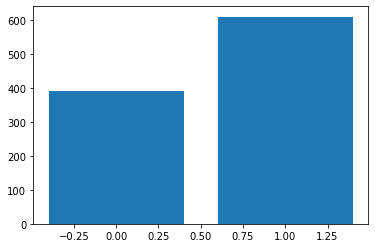

In [81]:
plt.bar([0,1], [positive, negative])

plt.show()


In [82]:
jnj_serch_term = '#JNJ -filter:retweets'

In [83]:
jnj_tweets = tweepy.Cursor(api.search, q=jnj_serch_term, lang='en', since= '2018-01-01', tweet_mode= 'extended').items(tweet_amount)

In [84]:
jnj_all_tweets = [tweet.full_text for tweet in jnj_tweets]


In [85]:
jnj_tweets_df = pd.DataFrame(jnj_all_tweets, columns=['Tweets'])

In [86]:
for _, row in jnj_tweets_df.iterrows():
    row['Tweets'] = re.sub('http\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('#\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('@\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('\\n', '', row['Tweets'])

In [87]:
jnj_tweets_df['Polarity'] = jnj_tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)

In [88]:
jnj_tweets_df['Result'] = jnj_tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

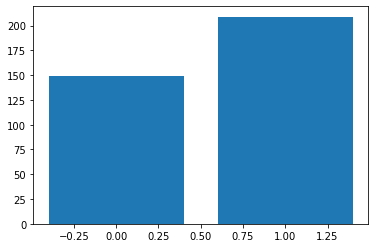

In [89]:
positive = jnj_tweets_df[jnj_tweets_df.Result == '+'].count()['Tweets']
negative = jnj_tweets_df[jnj_tweets_df.Result == '-'].count()['Tweets']
plt.bar([0,1], [positive, negative])

plt.show()


In [90]:
spy_serch_term = '#SPY -filter:retweets'

In [91]:
spy_tweets = tweepy.Cursor(api.search, q=spy_serch_term, lang='en', since= '2018-01-01', tweet_mode= 'extended').items(tweet_amount)

In [92]:
spy_all_tweets = [tweet.full_text for tweet in spy_tweets]

In [93]:
spy_tweets_df = pd.DataFrame(spy_all_tweets, columns=['Tweets'])

In [94]:
for _, row in spy_tweets_df.iterrows():
    row['Tweets'] = re.sub('http\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('#\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('@\S+', '', row['Tweets'])
    row['Tweets'] = re.sub('\\n', '', row['Tweets'])

In [95]:
spy_tweets_df['Polarity'] = spy_tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)

In [96]:
spy_tweets_df['Result'] = spy_tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

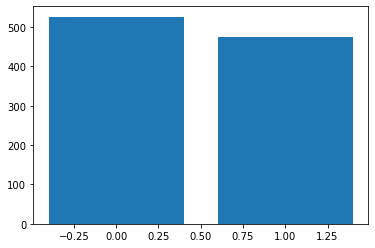

In [97]:
positive = spy_tweets_df[spy_tweets_df.Result == '+'].count()['Tweets']
negative = spy_tweets_df[spy_tweets_df.Result == '-'].count()['Tweets']
plt.bar([0,1], [positive, negative])

plt.show()

In [99]:
symbols = ["JNJ", "TSLA", "SPY"]
for symbol in symbols:
    url = f"https://api.stocktwits.com/api/2/streams/symbol/{symbol}.json"
    response = requests.get(url).json()
    print(f"THIS IS FOR {symbol}")
    print("====================")
    for item in response['messages']: 
        print(item['body'])
    print("====================")

THIS IS FOR JNJ
$ATNF  👉🏻 The founders have significant expertise in developing new therapeutics that were sold to big Pharma for billions. They are renowned for development of some of the largest-selling drugs to ever come to market. Now they aim to do it again with a pipeline of drug candidates in sequential stages of development that address large untapped markets. The founding scientists at 180 Life Sciences discovered the anti-TNF drug class that led to Remicade, the fourth all-time best-selling drug in the world. Presently owned by $JNJ , Remicade has exceeded $90 billion in total sales since approval. $ABBV licensed the anti-TNF patents from these scientists for use with Humira, the second best-selling drug in the world, with lifetime sales of $137 billion. $AMGN licensed the seventh best seller, Enbrel, that treats psoriasis and rheumatoid arthritis and has generated over $81 billion lifetime sales. $NVS licensed the world’s 12th best-selling drug, Diovan, has over $60 billion 

In [100]:
tsla_url = "https://api.stocktwits.com/api/2/streams/symbol/TSLA.json"
tsla_data = requests.get(tsla_url).json()

In [101]:
print(json.dumps(tsla_data, indent=4))

{
    "response": {
        "status": 200
    },
    "symbol": {
        "id": 8660,
        "symbol": "TSLA",
        "title": "Tesla, Inc.",
        "aliases": [],
        "is_following": false,
        "watchlist_count": 686033
    },
    "cursor": {
        "more": true,
        "since": 340656187,
        "max": 340648499
    },
    "messages": [
        {
            "id": 340656187,
            "body": "Billionaire problems\u2026 \n\n$TSLA $NIO $WKHS $SKLZ",
            "created_at": "2021-06-08T01:38:25Z",
            "user": {
                "id": 3001744,
                "username": "SmallCapSwinger",
                "name": "Bargain Hunter",
                "avatar_url": "https://avatars.stocktwits.com/production/3001744/thumb-1616567155.png",
                "avatar_url_ssl": "https://avatars.stocktwits.com/production/3001744/thumb-1616567155.png",
                "join_date": "2020-01-02",
                "official": false,
                "identity": "User",
            

In [102]:
capture = []

In [103]:
for d in tsla_data['messages']:
    capture.append(d['user']['like_count'])

In [104]:
tsla_likes =pd.DataFrame(capture).rename(columns ={0: 'Likes'})

In [105]:
tsla_df = pd.DataFrame(tsla_data['messages'])
tsla_df.head(10)

,id,body,created_at,user,source,symbols,mentioned_users,entities,links,likes,conversation,reshares
0,340656187,Billionaire problems… \n\n$TSLA $NIO $WKHS $SKLZ,2021-06-08T01:38:25Z,"{'id': 3001744, 'username': 'SmallCapSwinger',...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 6499, 'symbol': 'NIO', 'title': 'NIO I...",[],{'chart': {'thumb': 'https://charts.stocktwits...,NaN,NaN,NaN,NaN
1,340655831,$TSLA mentioned here http://www.stocksequity.c...,2021-06-08T01:37:11Z,"{'id': 1858443, 'username': 'stocktowatch7', '...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",[],{'sentiment': None},"[{'title': 'Hot Stock in Focus- Tesla, Inc. (N...",NaN,NaN,NaN
2,340655607,$SPCE $AMZN $TSLA,2021-06-08T01:36:28Z,"{'id': 2051890, 'username': 'wofl_of_wallstree...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 864, 'symbol': 'AMZN', 'title': 'Amazo...",[],{'chart': {'thumb': 'https://charts.stocktwits...,NaN,"{'total': 4, 'user_ids': [1612307, 1691651, 29...",NaN,NaN
3,340655472,$TSLA 700 EOW go go go,2021-06-08T01:36:05Z,"{'id': 3711134, 'username': 'Rocky101', 'name'...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",[],{'sentiment': {'basic': 'Bullish'}},NaN,"{'total': 4, 'user_ids': [2254209, 1691651, 29...","{'parent_message_id': 340655472, 'in_reply_to_...",NaN
4,340655446,$TSLA apparently this huge red flag about BTC...,2021-06-08T01:35:59Z,"{'id': 407233, 'username': 'bendrobidow', 'nam...","{'id': 2095, 'title': 'StockTwits For Android ...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",[],{'chart': {'thumb': 'https://charts.stocktwits...,NaN,"{'total': 1, 'user_ids': [2951435]}",NaN,NaN
5,340655031,$SPY I was dead wrong on market pullback on Fr...,2021-06-08T01:34:31Z,"{'id': 766446, 'username': 'SmallCapValueTradi...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",[],{'sentiment': {'basic': 'Bullish'}},NaN,NaN,"{'parent_message_id': 340655031, 'in_reply_to_...",NaN
6,340654736,"$TSLA when this shit will hit $700 , I am tire...",2021-06-08T01:33:24Z,"{'id': 1691651, 'username': 'karma101', 'name'...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",[],{'sentiment': {'basic': 'Bullish'}},NaN,NaN,"{'parent_message_id': 340654736, 'in_reply_to_...",NaN
7,340654511,$TSLA screw Elon...this going down,2021-06-08T01:32:37Z,"{'id': 4859730, 'username': 'Oneday121o', 'nam...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",[],{'sentiment': {'basic': 'Bearish'}},NaN,NaN,NaN,NaN
8,340654439,$QQQ $SPY $UVXY $AAPL $TSLA \n\nJust sayin’,2021-06-08T01:32:23Z,"{'id': 812524, 'username': 'sethmarcus', 'name...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 686, 'symbol': 'AAPL', 'title': 'Apple...",[],{'chart': {'thumb': 'https://charts.stocktwits...,NaN,"{'total': 3, 'user_ids': [3297926, 4288771, 48...",NaN,NaN
9,340654282,$TSLA https://cleantechnica.com/2021/06/06/mad...,2021-06-08T01:31:51Z,"{'id': 5249037, 'username': 'AarynDrake', 'nam...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",[],{'sentiment': {'basic': 'Bullish'}},[{'title': 'Tesla Cybertruck On The Horizon Fo...,"{'total': 2, 'user_ids': [3928814, 3782681]}",NaN,NaN


In [106]:
tsla_result = pd.concat([tsla_df, tsla_likes], axis = 1, join = 'outer').reset_index()


In [107]:
#formula worked, however Frank reran by mistake, which caused the error

tsla_result.drop(['created_at','source','conversation','mentioned_users','links','likes'], axis=1, inplace=True)

In [108]:
tsla_result

,index,id,body,user,symbols,entities,reshares,Likes
0,0,340656187,Billionaire problems… \n\n$TSLA $NIO $WKHS $SKLZ,"{'id': 3001744, 'username': 'SmallCapSwinger',...","[{'id': 6499, 'symbol': 'NIO', 'title': 'NIO I...",{'chart': {'thumb': 'https://charts.stocktwits...,NaN,4784
1,1,340655831,$TSLA mentioned here http://www.stocksequity.c...,"{'id': 1858443, 'username': 'stocktowatch7', '...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",{'sentiment': None},NaN,7
2,2,340655607,$SPCE $AMZN $TSLA,"{'id': 2051890, 'username': 'wofl_of_wallstree...","[{'id': 864, 'symbol': 'AMZN', 'title': 'Amazo...",{'chart': {'thumb': 'https://charts.stocktwits...,NaN,1516
3,3,340655472,$TSLA 700 EOW go go go,"{'id': 3711134, 'username': 'Rocky101', 'name'...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",{'sentiment': {'basic': 'Bullish'}},NaN,943
4,4,340655446,$TSLA apparently this huge red flag about BTC...,"{'id': 407233, 'username': 'bendrobidow', 'nam...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",{'chart': {'thumb': 'https://charts.stocktwits...,NaN,31150
5,5,340655031,$SPY I was dead wrong on market pullback on Fr...,"{'id': 766446, 'username': 'SmallCapValueTradi...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'sentiment': {'basic': 'Bullish'}},NaN,8192
6,6,340654736,"$TSLA when this shit will hit $700 , I am tire...","{'id': 1691651, 'username': 'karma101', 'name'...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",{'sentiment': {'basic': 'Bullish'}},NaN,2608
7,7,340654511,$TSLA screw Elon...this going down,"{'id': 4859730, 'username': 'Oneday121o', 'nam...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",{'sentiment': {'basic': 'Bearish'}},NaN,17
8,8,340654439,$QQQ $SPY $UVXY $AAPL $TSLA \n\nJust sayin’,"{'id': 812524, 'username': 'sethmarcus', 'name...","[{'id': 686, 'symbol': 'AAPL', 'title': 'Apple...",{'chart': {'thumb': 'https://charts.stocktwits...,NaN,23536
9,9,340654282,$TSLA https://cleantechnica.com/2021/06/06/mad...,"{'id': 5249037, 'username': 'AarynDrake', 'nam...","[{'id': 8660, 'symbol': 'TSLA', 'title': 'Tesl...",{'sentiment': {'basic': 'Bullish'}},NaN,962


In [109]:
spy_url = "https://api.stocktwits.com/api/2/streams/symbol/SPY.json"
spy_data = requests.get(spy_url).json()

In [110]:
print(json.dumps(spy_data, indent=4))

{
    "response": {
        "status": 200
    },
    "symbol": {
        "id": 7271,
        "symbol": "SPY",
        "title": "SPDR S&P 500",
        "aliases": [],
        "is_following": false,
        "watchlist_count": 339724
    },
    "cursor": {
        "more": true,
        "since": 340656159,
        "max": 340653219
    },
    "messages": [
        {
            "id": 340656159,
            "body": "$SPY Crash when??? Asking from a registered Trump supporter",
            "created_at": "2021-06-08T01:38:19Z",
            "user": {
                "id": 3058123,
                "username": "StackingDollaz",
                "name": "StackingDollaz",
                "avatar_url": "https://avatars.stocktwits.com/production/3058123/thumb-1621830721.png",
                "avatar_url_ssl": "https://avatars.stocktwits.com/production/3058123/thumb-1621830721.png",
                "join_date": "2020-01-28",
                "official": false,
                "identity": "User",
       

In [111]:
capture = []

In [112]:
for d in spy_data['messages']:
    capture.append(d['user']['like_count'])

In [113]:
spy_likes =pd.DataFrame(capture).rename(columns ={0: 'Likes'})

In [114]:
spy_df = pd.DataFrame(spy_data['messages'])
spy_df.head(10)

,id,body,created_at,user,source,symbols,likes,mentioned_users,entities,conversation,links
0,340656159,$SPY Crash when??? Asking from a registered Tr...,2021-06-08T01:38:19Z,"{'id': 3058123, 'username': 'StackingDollaz', ...","{'id': 2095, 'title': 'StockTwits For Android ...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...","{'total': 1, 'user_ids': [5278397]}",[],{'sentiment': None},NaN,NaN
1,340656003,$SPY this isn’t the turn this is 🖥 covering th...,2021-06-08T01:37:48Z,"{'id': 1350310, 'username': 'CybertronTrader',...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",NaN,[],{'sentiment': {'basic': 'Bearish'}},NaN,NaN
2,340655848,$SPY futes rippin,2021-06-08T01:37:15Z,"{'id': 5278397, 'username': 'BearWithSprinkleO...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...","{'total': 4, 'user_ids': [5278397, 4893479, 51...",[],{'sentiment': {'basic': 'Bullish'}},NaN,NaN
3,340655809,$SPY $QQQ Until London opens this Asian circle...,2021-06-08T01:37:08Z,"{'id': 5487748, 'username': 'Harmonica', 'name...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",NaN,[],{'sentiment': None},NaN,NaN
4,340655737,$SPY moo needs a face reveal I gotta put a fac...,2021-06-08T01:36:55Z,"{'id': 4187841, 'username': 'Fjabreu', 'name':...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",NaN,[],{'sentiment': None},NaN,NaN
5,340655584,$ASO $BGFV $DJIA $NASDAQ $SPY 🚀 🚀 consumer dis...,2021-06-08T01:36:25Z,"{'id': 1816414, 'username': 'sickwidit8', 'nam...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 677, 'symbol': 'DJIA', 'title': 'Dow J...",NaN,[],{'sentiment': {'basic': 'Bullish'}},NaN,NaN
6,340655406,$SPY futures faking the 3 and going to pass it...,2021-06-08T01:35:51Z,"{'id': 2062888, 'username': 'LuxuryPuddle', 'n...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...","{'total': 1, 'user_ids': [1350310]}",[],"{'giphy': {'id': '26BRrJHjNpAynLh28', 'ratio':...","{'parent_message_id': 340655406, 'in_reply_to_...",NaN
7,340655031,$SPY I was dead wrong on market pullback on Fr...,2021-06-08T01:34:31Z,"{'id': 766446, 'username': 'SmallCapValueTradi...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",NaN,[],{'sentiment': {'basic': 'Bullish'}},"{'parent_message_id': 340655031, 'in_reply_to_...",NaN
8,340655006,$SPY ⛔️423⛔️🚮📉,2021-06-08T01:34:27Z,"{'id': 1805890, 'username': 'LeviAckerman', 'n...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",NaN,[],{'chart': {'thumb': 'https://charts.stocktwits...,NaN,NaN
9,340654900,$SPY Imagine life 12-18 months from now and tr...,2021-06-08T01:34:05Z,"{'id': 1100925, 'username': 'AdamAlpha', 'name...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...","{'total': 2, 'user_ids': [1296635, 442465]}",[],{'sentiment': None},NaN,NaN


In [115]:
spy_result = pd.concat([spy_df, spy_likes], axis = 1, join = 'outer').reset_index()

In [116]:
spy_result.drop(['created_at','source','conversation','mentioned_users','links','likes'], axis=1, inplace=True)

In [117]:
spy_result

,index,id,body,user,symbols,entities,Likes
0,0,340656159,$SPY Crash when??? Asking from a registered Tr...,"{'id': 3058123, 'username': 'StackingDollaz', ...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'sentiment': None},15415
1,1,340656003,$SPY this isn’t the turn this is 🖥 covering th...,"{'id': 1350310, 'username': 'CybertronTrader',...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'sentiment': {'basic': 'Bearish'}},663
2,2,340655848,$SPY futes rippin,"{'id': 5278397, 'username': 'BearWithSprinkleO...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'sentiment': {'basic': 'Bullish'}},1921
3,3,340655809,$SPY $QQQ Until London opens this Asian circle...,"{'id': 5487748, 'username': 'Harmonica', 'name...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'sentiment': None},0
4,4,340655737,$SPY moo needs a face reveal I gotta put a fac...,"{'id': 4187841, 'username': 'Fjabreu', 'name':...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'sentiment': None},69
5,5,340655584,$ASO $BGFV $DJIA $NASDAQ $SPY 🚀 🚀 consumer dis...,"{'id': 1816414, 'username': 'sickwidit8', 'nam...","[{'id': 677, 'symbol': 'DJIA', 'title': 'Dow J...",{'sentiment': {'basic': 'Bullish'}},1152
6,6,340655406,$SPY futures faking the 3 and going to pass it...,"{'id': 2062888, 'username': 'LuxuryPuddle', 'n...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...","{'giphy': {'id': '26BRrJHjNpAynLh28', 'ratio':...",23128
7,7,340655031,$SPY I was dead wrong on market pullback on Fr...,"{'id': 766446, 'username': 'SmallCapValueTradi...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'sentiment': {'basic': 'Bullish'}},8192
8,8,340655006,$SPY ⛔️423⛔️🚮📉,"{'id': 1805890, 'username': 'LeviAckerman', 'n...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'chart': {'thumb': 'https://charts.stocktwits...,4008
9,9,340654900,$SPY Imagine life 12-18 months from now and tr...,"{'id': 1100925, 'username': 'AdamAlpha', 'name...","[{'id': 7271, 'symbol': 'SPY', 'title': 'SPDR ...",{'sentiment': None},24558


In [119]:
symbols = ["JNJ", "TSLA", "SPY"]
for symbol in symbols:
    url = f"https://api.stocktwits.com/api/2/streams/symbol/{symbol}.json"
    response = requests.get(url).json()
    print(f"THIS IS FOR {symbol}")
    print("====================")
    for item in response['messages']: 
        print(item['body'])
    print("====================")

THIS IS FOR JNJ
$ATNF  👉🏻 The founders have significant expertise in developing new therapeutics that were sold to big Pharma for billions. They are renowned for development of some of the largest-selling drugs to ever come to market. Now they aim to do it again with a pipeline of drug candidates in sequential stages of development that address large untapped markets. The founding scientists at 180 Life Sciences discovered the anti-TNF drug class that led to Remicade, the fourth all-time best-selling drug in the world. Presently owned by $JNJ , Remicade has exceeded $90 billion in total sales since approval. $ABBV licensed the anti-TNF patents from these scientists for use with Humira, the second best-selling drug in the world, with lifetime sales of $137 billion. $AMGN licensed the seventh best seller, Enbrel, that treats psoriasis and rheumatoid arthritis and has generated over $81 billion lifetime sales. $NVS licensed the world’s 12th best-selling drug, Diovan, has over $60 billion 

In [120]:
jnj_url = "https://api.stocktwits.com/api/2/streams/symbol/JNJ.json"
jnj_data = requests.get(jnj_url).json()

In [121]:
print(json.dumps(jnj_data, indent=4))

{
    "response": {
        "status": 200
    },
    "symbol": {
        "id": 6011,
        "symbol": "JNJ",
        "title": "Johnson & Johnson",
        "aliases": [],
        "is_following": false,
        "watchlist_count": 40749
    },
    "cursor": {
        "more": true,
        "since": 340614426,
        "max": 340283644
    },
    "messages": [
        {
            "id": 340614426,
            "body": "$ATNF  \ud83d\udc49\ud83c\udffb The founders have significant expertise in developing new therapeutics that were sold to big Pharma for billions. They are renowned for development of some of the largest-selling drugs to ever come to market. Now they aim to do it again with a pipeline of drug candidates in sequential stages of development that address large untapped markets. The founding scientists at 180 Life Sciences discovered the anti-TNF drug class that led to Remicade, the fourth all-time best-selling drug in the world. Presently owned by $JNJ , Remicade has exceeded $90

In [122]:
capture = []

In [123]:
for d in jnj_data['messages']:
    capture.append(d['user']['like_count'])

In [124]:
jnj_likes =pd.DataFrame(capture).rename(columns ={0: 'Likes'})

In [125]:
jnj_df = pd.DataFrame(jnj_data['messages'])
jnj_df.head(10)

,id,body,created_at,user,source,symbols,likes,mentioned_users,entities,links,conversation
0,340614426,$ATNF 👉🏻 The founders have significant expert...,2021-06-07T23:31:17Z,"{'id': 5021565, 'username': 'MDInvestments', '...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 838, 'symbol': 'AMGN', 'title': 'Amgen...","{'total': 17, 'user_ids': [5388464, 5009021, 1...",[],{'sentiment': {'basic': 'Bullish'}},NaN,NaN
1,340611796,$RMED this scam getting bought out by $JNJ jus...,2021-06-07T23:23:47Z,"{'id': 3724883, 'username': 'ElPresidente98', ...","{'id': 1149, 'title': 'StockTwits for iOS', 'u...","[{'id': 6011, 'symbol': 'JNJ', 'title': 'Johns...",NaN,[],{'sentiment': {'basic': 'Bearish'}},NaN,NaN
2,340601090,$JNJ $NVS $ABBV $MRK $LLY \n \nhttps://youtu....,2021-06-07T22:52:11Z,"{'id': 5469279, 'username': 'CarlKennerr', 'na...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 6011, 'symbol': 'JNJ', 'title': 'Johns...",NaN,[],{'sentiment': None},[{'title': 'AMC Stock Update🔥: AMC Is Going Af...,NaN
3,340588986,Free Shots for Indian Adults; Plea From Airlin...,2021-06-07T22:19:04Z,"{'id': 2762379, 'username': 'Newsfilter', 'nam...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 2385, 'symbol': 'JBLU', 'title': 'JetB...",NaN,[],{'sentiment': None},[{'title': 'Free Shots for Indian Adults; Plea...,NaN
4,340583206,Safe &amp; Effective?\n\nSerious adverse react...,2021-06-07T22:04:15Z,"{'id': 5149514, 'username': 'BioWreck', 'name'...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 2723, 'symbol': 'MRNA', 'title': 'Mode...",NaN,[],{'sentiment': None},[{'title': '9 more Australians report blood cl...,"{'parent_message_id': 340583206, 'in_reply_to_..."
5,340576276,Safe &amp; Effective?\n\nCDC Reports: COVID ho...,2021-06-07T21:47:45Z,"{'id': 5149514, 'username': 'BioWreck', 'name'...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 2723, 'symbol': 'MRNA', 'title': 'Mode...",NaN,[],{'sentiment': None},"[{'title': 'COVID hospitalizations, deaths for...","{'parent_message_id': 340576276, 'in_reply_to_..."
6,340575707,$JNJ institutional ownership up 0.1% from 69.3...,2021-06-07T21:46:28Z,"{'id': 5027760, 'username': 'CZARBETS', 'name'...","{'id': 6353, 'title': 'Czar Bets', 'url': 'htt...","[{'id': 6011, 'symbol': 'JNJ', 'title': 'Johns...",NaN,[],{'sentiment': None},NaN,NaN
7,340575694,Exposure to equity markets in $MS TD Ameritrad...,2021-06-07T21:46:26Z,"{'id': 11403, 'username': 'Ro_Patel', 'name': ...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 686, 'symbol': 'AAPL', 'title': 'Apple...","{'total': 2, 'user_ids': [2030412, 251307]}",[],{'chart': {'thumb': 'https://charts.stocktwits...,NaN,NaN
8,340557873,$BIIB this drug is so much more needed than co...,2021-06-07T21:08:12Z,"{'id': 818960, 'username': 'cryptoinspace', 'n...","{'id': 2095, 'title': 'StockTwits For Android ...","[{'id': 1075, 'symbol': 'BIIB', 'title': 'Biog...","{'total': 4, 'user_ids': [1289404, 3062962, 49...",[],{'sentiment': {'basic': 'Bullish'}},NaN,"{'parent_message_id': 340557873, 'in_reply_to_..."
9,340556644,Safe &amp; Effective?\n\nSpike proteins admini...,2021-06-07T21:05:40Z,"{'id': 5149514, 'username': 'BioWreck', 'name'...","{'id': 2269, 'title': 'StockTwits Web', 'url':...","[{'id': 2723, 'symbol': 'MRNA', 'title': 'Mode...",NaN,[],{'sentiment': None},[{'title': 'Spike proteins administered intrav...,"{'parent_message_id': 340556644, 'in_reply_to_..."


In [126]:
jnj_result = pd.concat([jnj_df, jnj_likes], axis = 1, join = 'outer').reset_index()

In [127]:
jnj_result.drop(['created_at','source','conversation','mentioned_users','links','likes'], axis=1, inplace=True)

In [128]:
jnj_result

,index,id,body,user,symbols,entities,Likes
0,0,340614426,$ATNF 👉🏻 The founders have significant expert...,"{'id': 5021565, 'username': 'MDInvestments', '...","[{'id': 838, 'symbol': 'AMGN', 'title': 'Amgen...",{'sentiment': {'basic': 'Bullish'}},5142
1,1,340611796,$RMED this scam getting bought out by $JNJ jus...,"{'id': 3724883, 'username': 'ElPresidente98', ...","[{'id': 6011, 'symbol': 'JNJ', 'title': 'Johns...",{'sentiment': {'basic': 'Bearish'}},481
2,2,340601090,$JNJ $NVS $ABBV $MRK $LLY \n \nhttps://youtu....,"{'id': 5469279, 'username': 'CarlKennerr', 'na...","[{'id': 6011, 'symbol': 'JNJ', 'title': 'Johns...",{'sentiment': None},53
3,3,340588986,Free Shots for Indian Adults; Plea From Airlin...,"{'id': 2762379, 'username': 'Newsfilter', 'nam...","[{'id': 2385, 'symbol': 'JBLU', 'title': 'JetB...",{'sentiment': None},536
4,4,340583206,Safe &amp; Effective?\n\nSerious adverse react...,"{'id': 5149514, 'username': 'BioWreck', 'name'...","[{'id': 2723, 'symbol': 'MRNA', 'title': 'Mode...",{'sentiment': None},0
5,5,340576276,Safe &amp; Effective?\n\nCDC Reports: COVID ho...,"{'id': 5149514, 'username': 'BioWreck', 'name'...","[{'id': 2723, 'symbol': 'MRNA', 'title': 'Mode...",{'sentiment': None},0
6,6,340575707,$JNJ institutional ownership up 0.1% from 69.3...,"{'id': 5027760, 'username': 'CZARBETS', 'name'...","[{'id': 6011, 'symbol': 'JNJ', 'title': 'Johns...",{'sentiment': None},142
7,7,340575694,Exposure to equity markets in $MS TD Ameritrad...,"{'id': 11403, 'username': 'Ro_Patel', 'name': ...","[{'id': 686, 'symbol': 'AAPL', 'title': 'Apple...",{'chart': {'thumb': 'https://charts.stocktwits...,832
8,8,340557873,$BIIB this drug is so much more needed than co...,"{'id': 818960, 'username': 'cryptoinspace', 'n...","[{'id': 1075, 'symbol': 'BIIB', 'title': 'Biog...",{'sentiment': {'basic': 'Bullish'}},9952
9,9,340556644,Safe &amp; Effective?\n\nSpike proteins admini...,"{'id': 5149514, 'username': 'BioWreck', 'name'...","[{'id': 2723, 'symbol': 'MRNA', 'title': 'Mode...",{'sentiment': None},0


In [129]:
load_dotenv()

True

In [157]:
quiver_api_key = os.getenv("quiver_api_key")
ALPACA_API_KEY = os.getenv('ALPACA_API_KEY')
ALPACA_SECRET_KEY = os.getenv('ALPACA_SECRET_KEY')

In [158]:

quiverquant_url = "https://api.quiverquant.com/beta/live/housetrading"
headers = {'accept': 'application/json',
'X-CSRFToken': 'TyTJwjuEC7VV7mOqZ622haRaaUr0x0Ng4nrwSRFKQs7vdoBcJlK9qjAS69ghzhFu',
'Authorization': f'Token{quiver_api_key}'}
r = requests.get(quiverquant_url, headers=headers).json()
print(r)



{'detail': 'Authentication credentials were not provided.'}


In [ ]:
Rep_df = pd.DataFrame(r)
Rep_df['Range'] = Rep_df['Range'].str.replace('$', '')
Rep_df.head()

In [ ]:
for name in Rep_df['Representative']:
    name = name.strip()

In [ ]:
Rep_df_2 = df.head()

In [ ]:
# tsla_df = pd.DataFrame(df2[df2['Ticker']=="TSLA"]).groupby(['Ticker', 'Representative','Transaction']).mean()
# tsla_df.plot(figsize = [20,10])

In [ ]:
df2 = df.set_index('Representative')
tsla_df = pd.DataFrame(df2[df2['Ticker']=="TSLA"])
tsla_df.head()

In [ ]:
tsla_sales = tsla_df[tsla_df['Transaction']=='Sale']
tsla_purchase = tsla_df[tsla_df['Transaction']=='Purchase']
tsla_df2 = pd.concat([tsla_sales,tsla_purchase])
tsla_df2.drop(['Range', 'Amount', 'Date'], axis='columns', inplace=True)
tsla_df2

In [ ]:
tsla_df.Range.hist(figsize = [10,5]);

In [ ]:
jnj_df = pd.DataFrame(df2[df2['Ticker']=="JNJ"])
jnj_df.head()

In [ ]:
jnj_sales = jnj_df[jnj_df['Transaction']=='Sale']
jnj_purchase = jnj_df[jnj_df['Transaction']=='Purchase']
jnj_df = pd.concat([jnj_sales,jnj_purchase])
jnj_df

In [ ]:
jnj_sales = jnj_df[jnj_df['Transaction']=='Sale'].plot.bar()

In [ ]:
jnj_purchase = jnj_df[jnj_df['Transaction']=='Purchase'].plot.bar()

In [ ]:
jnj_df.plot.bar(figsize = [10,5])

In [ ]:
jnj_df.Range.hist(figsize = [10,5]);

In [ ]:
spy_df = pd.DataFrame(df2[df2['Ticker']=="SPY"])
spy_df

In [ ]:
spy_df.plot.bar(figsize = [10,5])

In [ ]:
spy_df.Range.hist(figsize = [10,5]);

In [ ]:
alpaca = tradeapi.REST(API_KEYS, API_SEC_KEY, api_version="v2")

In [ ]:
timeframesios = "1D"

In [ ]:
df_portfolio = alpaca.get_barset(['JNJ', "TSLA", "SPY"], timeframe=timeframesios, start="2020-02-08", end="2021-02-08").df

In [ ]:
df_portfolio.head()